In [1]:
%pylab inline
import tensorflow as tf
from itertools import groupby
import pandas as pd
from collections import OrderedDict
from datetime import date
import pyodbc
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


C:\Users\Vivi\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
#Data = pd.read_csv('MasernAndCoords.csv',encoding='latin-1')
Data = pd.read_csv('StomachVirusInput.csv',encoding='latin-1')
Data.columns=['ID','week','year','county','count','incidence','X','Y','BinX','BinY']
Data

,ID,week,year,county,count,incidence,X,Y,BinX,BinY
0,0,1,2001,LK Altenkirchen,1.0,19.892800,[7.7270285],[50.73946897],[3],[7]
1,1,1,2001,LK Ammerland,1.0,34.366229,[8.03291064],[53.22147688],[4],[12]
2,2,1,2001,LK Anhalt-Bitterfeld,1.0,18.432613,[12.17414403],[51.77891857],[11],[9]
3,3,1,2001,LK Bad Dürkheim,5.0,101.440870,[8.0989165],[49.43943465],[4],[4]
4,4,1,2001,LK Barnim,1.0,24.270536,[13.72397933],[52.82678413],[13],[11]
5,5,1,2001,LK Bautzen,2.0,21.857354,[14.20996868],[51.3147493],[14],[8]
6,6,1,2001,LK Bernkastel-Wittlich,1.0,22.757731,[6.94707509],[49.9288013],[2],[5]
7,7,1,2001,LK Biberach,2.0,37.901348,[9.7384129],[48.12156599],[7],[2]
8,8,1,2001,LK Birkenfeld,1.0,39.433904,[7.31217013],[49.7137353],[2],[5]
9,9,1,2001,LK Bitburg-Prüm,1.0,24.896610,[6.41060344],[50.07655585],[1],[6]


In [129]:
allMaps = []
for m in range(15):
    for n in range(52):
        year = 2001+m
        thisweek = Data[Data['year']==year][Data[Data['year']==year]['week']==n]
        thisweek = thisweek.reset_index(drop=True)
        currentMap = np.zeros((16,16))
        currentCount = np.zeros((16,16))
        for i in range(shape(thisweek)[0]):
            inc = thisweek['incidence'][i]
            x = int(thisweek['BinX'][i][1:-1])
            y = int(thisweek['BinY'][i][1:-1])
            currentMap[x][y]=currentMap[x][y]+inc
            currentCount[x][y]=currentCount[x][y]+1
        currentMap = currentMap/currentCount
        allMaps.append(np.nan_to_num(currentMap))
    #plt.imshow(currentMap, cmap='hot', interpolation='nearest',animated=True)
    #plt.show()

C:\Users\Vivi\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [133]:
np.save('whatever.npy',allMaps)

spread of stomach virus during week 13 in 2001:


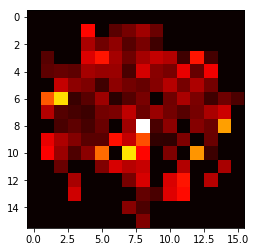

In [131]:
plt.imshow(allMaps[13], cmap='hot', interpolation='nearest',animated=True)
print("spread of stomach virus during week 13 in 2001:")
plt.show()

In [69]:
lenall = shape(allMaps)[0]
trainSize = lenall//3*2#define sizes for data sets (train: 2/3, val:1/6, test:1/6 of whole dataset) 
valSize = lenall//6

#Split data into train, val and test set------------------------------------------
trainingData = allMaps[0:trainSize]
validationData = allMaps[trainSize+1:trainSize+valSize]
testData = allMaps[trainSize+valSize+1:]
shape(testData)

(127, 16, 16)

In [78]:
#Method to get batches------------------------------------------------------------
def getBatches(batchsize,numIn,typeBatch):
    if typeBatch=="train":
        Batches=[]
        Labels=[]
        batchsize = batchsize+numIn
        rand = np.random.randint(0,trainSize-(batchsize+1))
        batch = trainingData[rand:rand+(batchsize+1)]#trainingData[count*batchsize:(count+1)*batchsize]
        for i,e in enumerate(batch):
            if i<batchsize-(numIn):
                inp = batch[i:i+numIn]
                tar = batch[i+numIn+1]
                Batches.append(inp)
                Labels.append(tar)
    elif typeBatch=="val":
        Batches=[]
        Labels=[]
        batchsize = batchsize+numIn
        rand = np.random.randint(0,valSize-(batchsize+1))
        batch = validationData[rand:rand+(batchsize+1)]#trainingData[count*batchsize:(count+1)*batchsize]
        for i,e in enumerate(batch):
            if i<batchsize-(numIn):
                inp = batch[i:i+numIn]
                tar = batch[i+numIn+1]
                Batches.append(inp)
                Labels.append(tar)
    elif typeBatch=="test":
        Batches=[]
        Labels=[]
        batchsize = batchsize+numIn
        testSize = lenall-trainSize-valSize
        rand = np.random.randint(0,testSize-(batchsize+1))
        batch = testData[rand:rand+(batchsize+1)]
        for i,e in enumerate(batch):
            if i<batchsize-(numIn):
                inp = batch[i:i+numIn]
                tar = batch[i+numIn+1]
                Batches.append(inp)
                Labels.append(tar)
    else:
        print("typeBatch needs to be set to one of these values: train, val, test.")
        pass
    return Batches,Labels       

In [82]:
b,l = getBatches(50,3,'train')
print(shape(b))

(50, 3, 16, 16)


Step 1: Minibatch Loss: 9271.037109
Step 1: Minibatch Loss: 13405.761719
Step 1000: Minibatch Loss: 2376.621094
Step 1000: Minibatch Loss: 2190.462402
Step 2000: Minibatch Loss: 7311.262207
Step 2000: Minibatch Loss: 6834.213867
Step 3000: Minibatch Loss: 3785.861328
Step 3000: Minibatch Loss: 2799.366211
Step 4000: Minibatch Loss: 3651.300781
Step 4000: Minibatch Loss: 2949.805664
Step 5000: Minibatch Loss: 10087.669922
Step 5000: Minibatch Loss: 4887.531250
Step 6000: Minibatch Loss: 3387.766113
Step 6000: Minibatch Loss: 4722.607910
Step 7000: Minibatch Loss: 1472.523438
Step 7000: Minibatch Loss: 1406.789429
Step 8000: Minibatch Loss: 4613.976562
Step 8000: Minibatch Loss: 3646.793945
Step 9000: Minibatch Loss: 2303.298584
Step 9000: Minibatch Loss: 4912.186523
Step 10000: Minibatch Loss: 5181.958496
Step 10000: Minibatch Loss: 4768.428711
Target


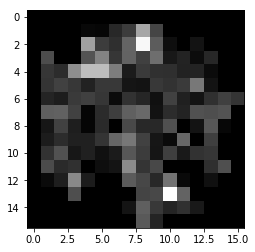

Predicted


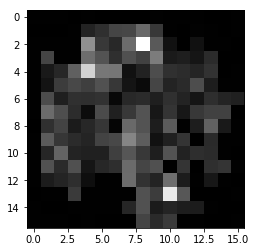

In [183]:
#code from https://github.com/aymericdamien/TensorFlow-Examples/tree/master/examples/3_NeuralNetworks (Autoencoder)
from __future__ import division, print_function, absolute_import

# Training Parameters
learning_rate = 0.01
num_steps = 10000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)
num_input = 16*16 

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])
y_true = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
    'h1': tf.Variable(tf.random_normal([num_input, num_input],stddev=1/num_input)),
    'out': tf.Variable(tf.random_normal([num_input, num_input],stddev=1/num_input)),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
    'b1': tf.Variable(tf.random_normal([num_input])),
    'bout': tf.Variable(tf.random_normal([num_input])),
}

# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

def multilayer_perceptron(x):
    # Hidden fully connected layer with 256 neurons
    layer_1f = tf.nn.tanh(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_1f, weights['out']) + biases['bout']
    return out_layer
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

perc = multilayer_perceptron(decoder_op)

# Prediction
y_pred = perc

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start Training
# Start a new TF session
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training
    for i in range(1, num_steps+1):
        # Prepare Data
        # Get the next batch of MNIST data (only images are needed, not labels)
        for b in getBatches(batch_size,1,"train"):
            # Run optimization op (backprop) and cost op (to get loss value)
            _, l,pred = sess.run([optimizer, loss, y_pred], feed_dict={X: np.reshape(b[0],(1,16*16)),y_true:np.reshape(b[1],(1,16*16))})
            # Display logs per step

            if i % display_step == 0 or i == 1:
                print('Step %i: Minibatch Loss: %f' % (i, l))

    print("Target")
    plt.figure(figsize=(n, n))
    plt.imshow(np.reshape(b[1],(16,16)), origin="upper", cmap="gray")
    plt.show()

    print("Predicted")
    plt.figure(figsize=(n, n))
    plt.imshow(np.reshape(pred,(16,16)), origin="upper", cmap="gray")
plt.show()

# Just some plotting of FFN performance

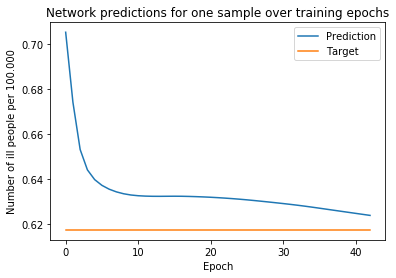

In [185]:
a = np.multiply([0.9823748,0.70424765, 0.69103467, 0.67615378, 0.66862941, 0.66479069,
       0.66269767, 0.66174453, 0.66155505],100)
b = np.multiply([0.61751538,0.61751538, 0.61751538, 0.61751538, 0.61751538, 0.61751538,
       0.61751538, 0.61751538, 0.61751538],100)
aLong = [0.70528531, 0.67421943, 0.65319955, 0.64418364, 0.63985246,
       0.63731015, 0.6356014 , 0.63440669, 0.63356692, 0.6330201 ,
       0.63269949, 0.63252395, 0.63244438, 0.63243234, 0.63245773,
       0.63247609, 0.63245535, 0.63238692, 0.63228643, 0.63216603,
       0.63201654, 0.63183784, 0.63163429, 0.63140702, 0.63115382,
       0.63087296, 0.63056743, 0.63024557, 0.62991351, 0.62957311,
       0.62922382, 0.62885988, 0.62847352, 0.6280601 , 0.62762272,
       0.62716961, 0.62670946, 0.62624854, 0.62578881, 0.62533033,
       0.62487292, 0.62441707, 0.62396324]
a2 = np.multiply([0.53520077, 0.53934836, 0.55109257, 0.57535219, 0.58218175,
       0.58267844, 0.58158273, 0.58005685, 0.57872945, 0.57771158,
       0.5769375 , 0.57632703, 0.57582247, 0.5753898 , 0.57500923,
       0.5746702 , 0.57436657, 0.57409537, 0.57385439, 0.57364196,
       0.57345659, 0.5732972 , 0.57316262, 0.57305181, 0.57296371,
       0.57289732, 0.57285148, 0.57282478, 0.57281554, 0.57282197,
       0.57284218, 0.57287556, 0.57292175, 0.5729807 , 0.57305205,
       0.5731352 , 0.57322955, 0.57333452, 0.57344937, 0.57357395,
       0.57370764, 0.57385021, 0.57400131, 0.57416058, 0.57432759,
       0.57450181, 0.57468307, 0.57487112, 0.57506537, 0.57526517,
       0.57546967, 0.57567799, 0.57588792, 0.5760988 ],100)
bLong = [0.61751538, 0.61751538, 0.61751538, 0.61751538, 0.61751538,
       0.61751538, 0.61751538, 0.61751538, 0.61751538, 0.61751538,
       0.61751538, 0.61751538, 0.61751538, 0.61751538, 0.61751538,
       0.61751538, 0.61751538, 0.61751538, 0.61751538, 0.61751538,
       0.61751538, 0.61751538, 0.61751538, 0.61751538, 0.61751538,
       0.61751538, 0.61751538, 0.61751538, 0.61751538, 0.61751538,
       0.61751538, 0.61751538, 0.61751538, 0.61751538, 0.61751538,
       0.61751538, 0.61751538, 0.61751538, 0.61751538, 0.61751538,
       0.61751538, 0.61751538, 0.61751538]
plt.plot(aLong)
plt.plot(bLong)
plt.legend(['Prediction', 'Target'])
plt.xlabel('Epoch')
plt.ylabel('Number of ill people per 100.000')
plt.title('Network predictions for one sample over training epochs')
plt.show()

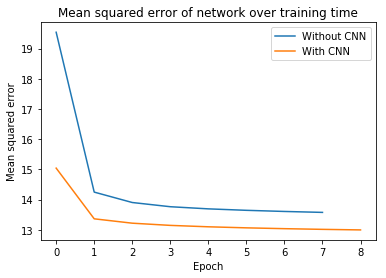

In [156]:
loss = np.multiply([0.19540015, 0.14247412, 0.13903136, 0.13763657, 0.13692768,
       0.13644582, 0.13606944, 0.13575951],100)
loss2 = np.multiply([0.22045391, 0.14341622, 0.13855337, 0.13671467, 0.13574011,
       0.13514559, 0.13473221, 0.13442541],100)
loss3 = np.multiply([0.15041186, 0.13363026, 0.13218569, 0.13145833, 0.13099016,
       0.13064401, 0.13037032, 0.13014529, 0.12995776],100)
WithCNNFullLoss = [0.22045391, 0.14341622, 0.13855337, 0.13671467, 0.13574011,
       0.13514559, 0.13473221, 0.13442541, 0.13418384, 0.13398356,
       0.13381277, 0.13366273, 0.13352646, 0.13340038, 0.13328316,
       0.13317315, 0.13306889, 0.13296967, 0.13287532, 0.13278582,
       0.13270087, 0.13262006, 0.13254317, 0.13247002, 0.13240037,
       0.13233401, 0.13227077, 0.13221056, 0.13215323, 0.13209853,
       0.1320462 , 0.13199603, 0.13194785, 0.13190153, 0.13185696,
       0.13181405, 0.13177271, 0.13173289, 0.13169451, 0.1316575 ,
       0.13162179, 0.13158732, 0.13155404]
plt.plot(loss)
plt.plot(loss3)
plt.xlabel('Epoch')
plt.ylabel('Mean squared error')
plt.legend(['Without CNN', 'With CNN'])
plt.title('Mean squared error of network over training time')
plt.show()

19.87970720505798


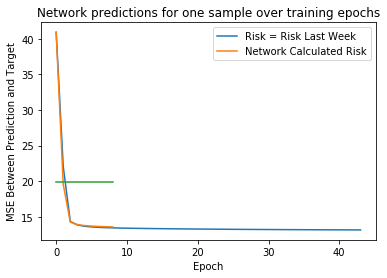

In [143]:

print(np.mean(mses)*100)
mse = np.mean(mses)*100
mseplot = [mse,mse,mse,mse,mse,mse,mse,mse,mse]
plt.plot(loss)
plt.plot(loss2)
plt.plot(mseplot)
plt.legend(['Risk = Risk Last Week', 'Network Calculated Risk'])
plt.xlabel('Epoch')
plt.ylabel('MSE Between Prediction and Target')
plt.title('Network predictions for one sample over training epochs')
plt.show()